# Principal Component Analysis

- Tutorial on how to find principle components
- Perform SVD, which decomposes  training set matrix X into the dot product of three matrices U, E, V.T (where V.T contains all the principle components)
- Perform EigenValue Matrix Decomposition of covariance Matrix
- Perform PCA with Scikit Learn
- Compare the performance of Logistic Regression without  applying PCA  and the performance of model with PCA 

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [6]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Inspect the dataset

In [9]:
X=pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y= dataset['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X.shape

(569, 30)

# Apply PCA
Three kinds of PCA:
1. Eigen value Matrix decomposition of the covariance matrix
2. Singular Value Decomoposition of data matric
3. Scikit-learn PCA

Prerequisite, center and scale the feature vectors

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


In [13]:
#new dataframe with scaled values
df = pd.DataFrame(X_scaled, columns=dataset['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 1.Eigen value Matrix decomposition of the covariance matrix

### Calculate the covariance matrix

In [15]:
features = X_scaled.T
covariance_mat= np.cov(features)
covariance_mat[0]

array([ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
        0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
        0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
        0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
        0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
        0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833])

### Calculate the EigenVectors and EigenValues from the Covariance Matrix

In [16]:
eig_values, eig_vectors = np.linalg.eig(covariance_mat)

In [26]:
eig_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [24]:
eig_vectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [28]:
# find the variance  of each eigen value by dividing the eigen values with the sum of all eigen values
variance = eig_values/sum(eig_values)
variance

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 4.43482743e-06,
       2.49601032e-05, 5.29779290e-05, 2.30015463e-04, 2.72587995e-04,
       5.16042379e-04, 6.01833567e-04, 8.11361259e-04, 9.14646751e-04,
       1.03864675e-03, 9.99096464e-04])

### Find the variance of the first principal component

In [29]:
variance[0]

0.44272025607526344

### Choose the Principal Components by selecting the Eigen values with the highest variance (highest eigenvalues)

In [35]:
V= eig_vectors[:,:2]
V

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [36]:
# Project original matrix into EigenVectors
X_projected = X_scaled.dot(V)
X_projected

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [40]:
# Create the new X_projected dataframe , the new dimensionality reduced dataset
X_pca = pd.DataFrame(X_projected, columns=['PCA1', 'PCA2'])
X_pca.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


# 2. Singular Value Decomposition

In [41]:
#center the data
X_centered = X_scaled - X_scaled.mean()

In [42]:
#apply SVD
U,s,V = np.linalg.svd(X_centered)

In [43]:
#chose the principal componentes( the ones that have higher eigen values)
W = V.T[:,:2]

In [44]:
#project original matrix into the principal components
projected_X = X_centered.dot(W)

In [47]:
# Create the new reduced matrix
X_pca_svd= pd.DataFrame(projected_X, columns=['PCA1', 'PCA2'])
X_pca_svd.head()

,PCA1,PCA2
0,-9.192837,-1.948583
1,-2.387802,3.768172
2,-5.733896,1.075174
3,-7.122953,-10.275589
4,-3.935302,1.948072


#  3.Scikit-learn PCA

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(data = components, columns=['PCA1', 'PCA2'])


In [49]:
X_pca.shape

(569, 2)

In [50]:
X_pca.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


# Visualizing Principal Components

Text(0, 0.5, 'Second principle component')

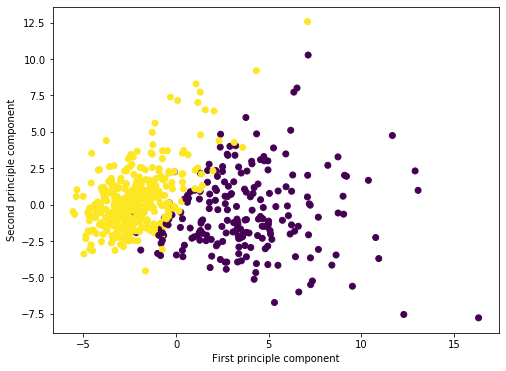

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca['PCA1'], X_pca['PCA2'], c=dataset['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [58]:
# Interpreting Pricinples Components with the features names
pd.DataFrame(pca.components_, columns=dataset['feature_names'],  index=('PC1','PC2'))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


# Choosing the right number of Principal Components

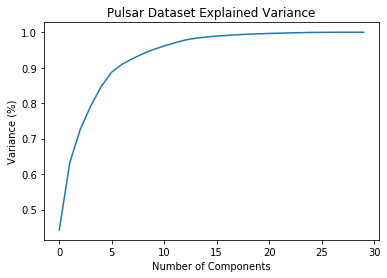

In [62]:
pca2 = PCA().fit(X_scaled)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

 -We have the 95% variance with approximately 15 number of components

# Comparison between the perfomance of a model without PCA and with PCA

### Model without PCA

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Create logistic regression object
clf = LogisticRegression(random_state=0)

In [64]:
# Split into training and test sets using ORIGINAL dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [68]:
# Train model
model = clf.fit(X_train, y_train)

In [69]:
# Perform 10-Fold Cross Validation
result = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
result.mean()

0.9571231836032352

### Model with PCA

In [70]:
from sklearn.decomposition import PCA
pca = PCA()
components=pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(data = components)

In [71]:
# Split into training and test sets using REDUCED dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=1)

In [72]:
# Train model
model = clf.fit(X_train, y_train)

In [73]:
# Perform 10-Fold Cross Validation
result = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
result.mean()

0.9806898043152618